In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

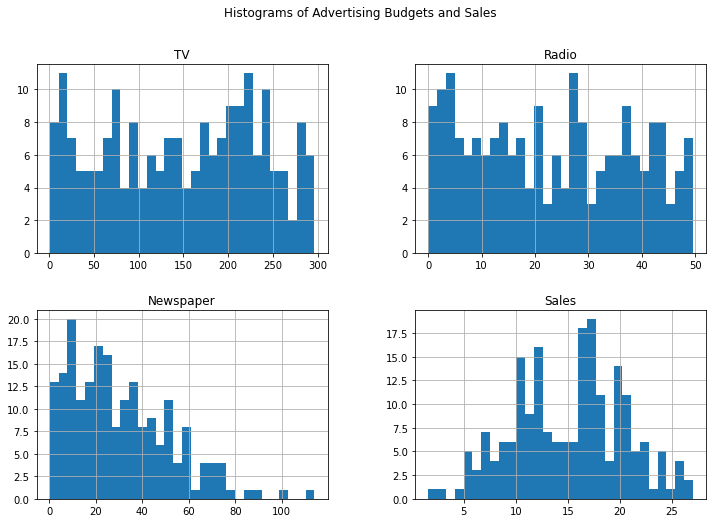

In [8]:
data[['TV', 'Radio', 'Newspaper', 'Sales']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Advertising Budgets and Sales')
plt.show()

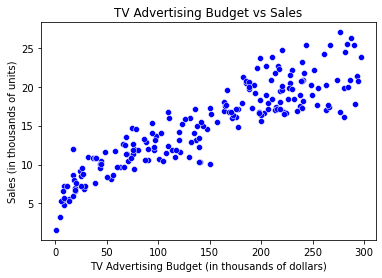

In [11]:
sns.scatterplot(x='TV', y='Sales', data=data,color='blue')
plt.title('TV Advertising Budget vs Sales')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.show()

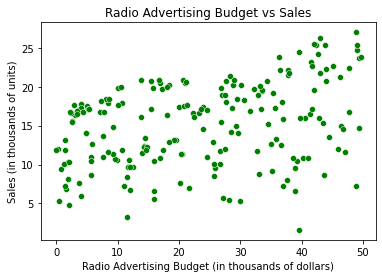

In [12]:
sns.scatterplot(x='Radio', y='Sales', data=data,color='green')
plt.title('Radio Advertising Budget vs Sales')
plt.xlabel('Radio Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.show()

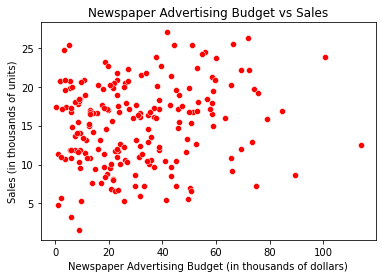

In [13]:
sns.scatterplot(x='Newspaper', y='Sales', data=data,color='red')
plt.title('Newspaper Advertising Budget vs Sales')
plt.xlabel('Newspaper Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.show()

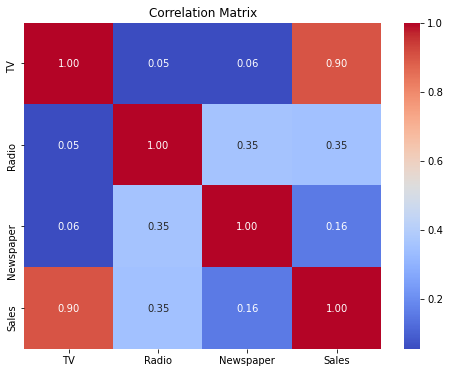

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

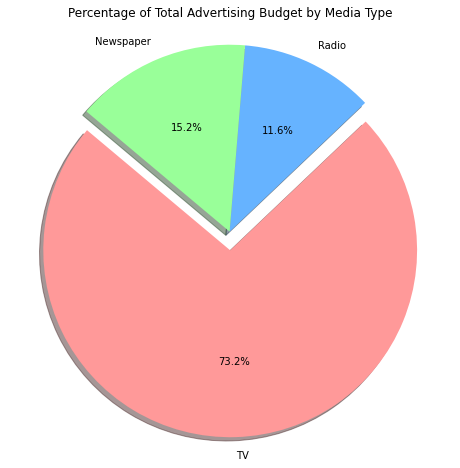

In [15]:
total_tv = data['TV'].sum()
total_radio = data['Radio'].sum()
total_newspaper = data['Newspaper'].sum()


total_budget = total_tv + total_radio + total_newspaper
percent_tv = (total_tv / total_budget) * 100
percent_radio = (total_radio / total_budget) * 100
percent_newspaper = (total_newspaper / total_budget) * 100

# Data for the pie chart
labels = ['TV', 'Radio', 'Newspaper']
sizes = [percent_tv, percent_radio, percent_newspaper]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode the first slice (TV)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Total Advertising Budget by Media Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
#fit the model
model.fit(X_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.522552562041289
R-squared: 0.8645053923967725


In [26]:
print(y_pred)

[10.70988945  8.68629773  9.5778695  24.86207988 14.65584473  8.3214275
 10.43048002 18.4453765   9.73394291 17.9290798  23.369886   10.67916356
 13.44032325 17.17416235 11.77380187 13.37072678 21.26009906  9.19666875
 14.13201846 18.9260716  24.75507991 12.48481182 16.57130583 13.77344772
  7.79299106 15.19648316 14.71607944 20.73862119 17.01041859  8.83474391
 12.09424377 20.74886454 21.26147987 21.90420095  7.08087067  7.04431681
  9.15949871 15.47796148 13.28282334  7.23769883]


In [27]:
future_data = pd.DataFrame({
    'TV': [300, 150, 200],  # Future TV advertising budgets
    'Radio': [100, 50, 75],  # Future Radio advertising budgets
    'Newspaper': [60, 30, 45]  # Future Newspaper advertising budgets
})

# Make predictions on the future data
future_predictions = model.predict(future_data)

# Display the predictions
future_data['Predicted Sales'] = future_predictions
print(future_data)

    TV  Radio  Newspaper  Predicted Sales
0  300    100         60        31.819146
1  150     50         30        18.296175
2  200     75         45        23.715659
